### **BA Weekly Return–Volatility Analysis (2020–2024)**

In [1]:
import pandas as pd
import numpy as np

In [2]:
ba_df_volatility = pd.read_csv("ba_weekly_return_volatility.csv")
ba_df_detailed = pd.read_csv("ba_weekly_return_detailed.csv")

ba_df_detailed.head()

,Close,High,Low,Open,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,label
0,331.348572,331.378393,325.761816,326.606765,4544400,0.000,1/2/20,0,2020,2,Thursday,-0.0840,0.118794,green
1,330.791901,332.909308,328.346429,328.674494,3875900,-0.168,1/3/20,0,2020,3,Friday,-0.0840,0.118794,green
2,331.766083,332.879454,325.940756,327.352341,5355000,0.294,1/6/20,1,2020,6,Monday,-0.1612,1.584772,green
3,335.285156,342.154291,328.754007,332.283029,9898600,1.061,1/7/20,1,2020,7,Tuesday,-0.1612,1.584772,green
4,329.410095,332.054366,327.650575,330.434002,8239200,-1.752,1/8/20,1,2020,8,Wednesday,-0.1612,1.584772,green


In [3]:
labels = ba_df_detailed[['Year','Week_Number', 'label']].drop_duplicates()

ba_df_volatility = ba_df_volatility.merge(
    labels, 
    on=['Year','Week_Number'], 
    how='inner'
)
ba_df_volatility.head()

,Year,Week_Number,mean_return,volatility,label
0,2020,0,-0.08400,0.118794,green
1,2020,1,-0.16120,1.584772,green
2,2020,2,-0.34560,1.269723,green
3,2020,3,-0.05525,2.818341,green
4,2020,4,-0.28880,1.510424,green


In [4]:
import matplotlib.pyplot as plt

ba_df_volatility['mean_return'] = (ba_df_volatility['mean_return'] * 100).round(2)
ba_df_volatility['volatility'] = (ba_df_volatility['volatility'] * 100).round(2)

years = sorted(ba_df_volatility['Year'].dropna().unique())
years

[np.int64(2020),
 np.int64(2021),
 np.int64(2022),
 np.int64(2023),
 np.int64(2024)]

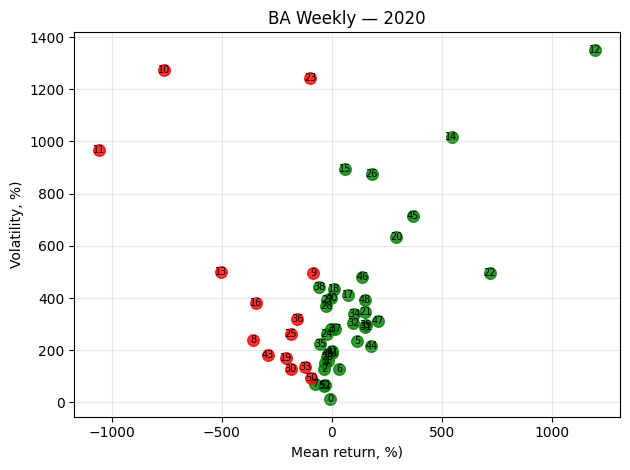

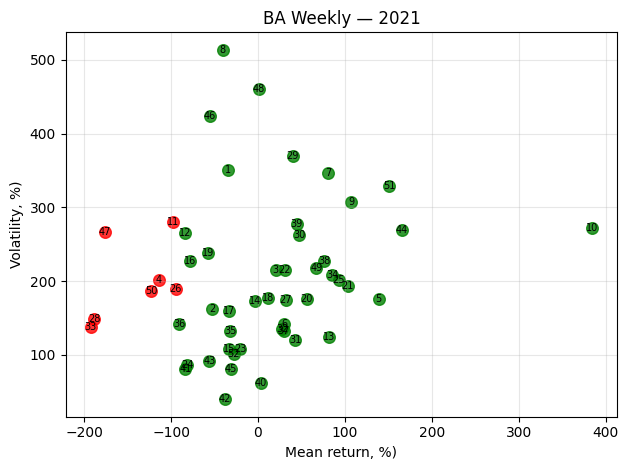

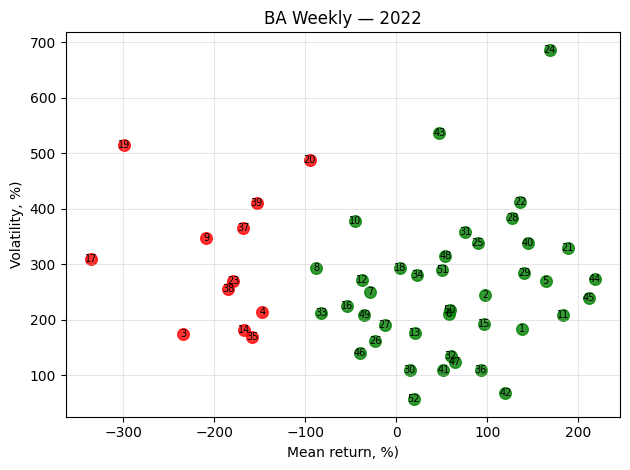

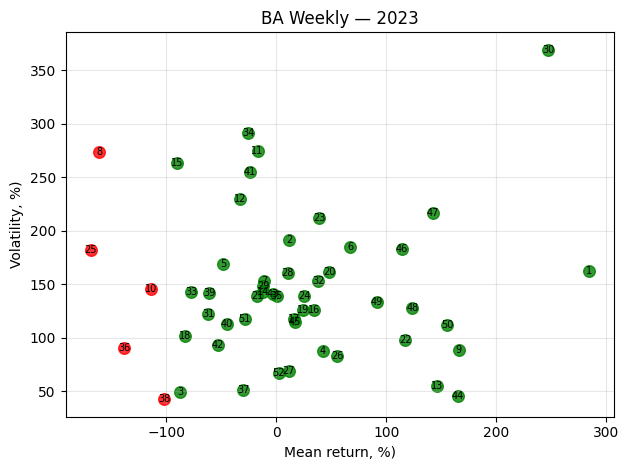

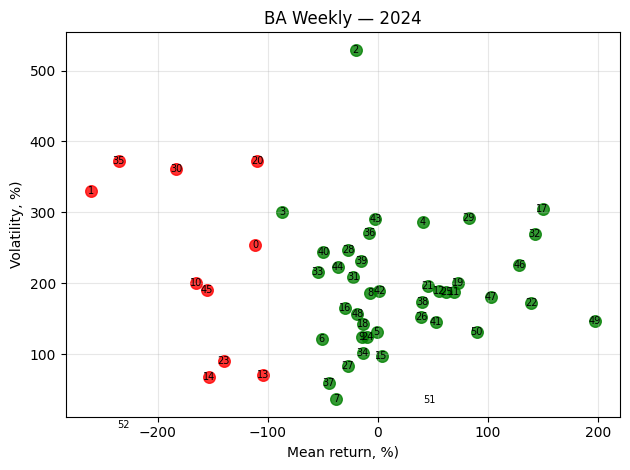

In [5]:
for yr in years:
    ba_dfy = ba_df_volatility[ba_df_volatility['Year'] == yr].copy()

    g = ba_dfy[ba_dfy['label'] == 'green']
    r = ba_dfy[ba_dfy['label'] == 'red']

    plt.figure()
    plt.scatter(g['mean_return'], g['volatility'], label='green', alpha=0.8, color="green", s=70)
    plt.scatter(r['mean_return'], r['volatility'], label='red', alpha=0.8, color="red", s=70)

    for _, row in ba_dfy.iterrows():
        plt.text(
            row['mean_return'], row['volatility'], 
            str(int(row['Week_Number'])), fontsize=7, 
            ha='center', va='center'
        )
    plt.xlabel('Mean return, %)')
    plt.ylabel('Volatility, %)')
    plt.title(f'BA Weekly — {yr}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    plt.savefig(f'./ba_labeling_plots_yearly/ba_labeling_{yr}.png', dpi=150)

plt.show()

#### **Patterns by Color**
In **2020** and **2022**, green points are grouped where the mean return is positive and volatility is lower. Red points mostly appear where returns are negative and volatility is high. In **2021, 2023, and 2024**, the colors are more mixed, but the same idea holds — green points stay closer to the center or right side (positive μ), while red points move toward high volatility or negative returns.


#### **Clusters of Green and Red**
Green points show more stable weeks — when returns are positive and volatility is not too high.  
Red points show riskier or losing weeks with higher volatility.  
Still, there’s a lot of overlap, so not every week follows this clean rule.

#### **First Half of Each Year (Weeks 0–26)**
- 2020: Mostly red (pandemic crash period).  
- 2021: Still more red in the first half.  
- 2022: Similar — red dominates early months.  
- 2023: More green, showing recovery and stability.  
- 2024: More balanced, maybe slightly more green overall.  

Overall red dominates early years, but green increases after 2022 as markets calm down.

#### **Weeks Furthest from the Origin**
Along the **x-axis (μ)**: furthest points are mostly green — big positive returns.  
Along the **y-axis (σ)**: furthest points are usually red — high volatility weeks.


#### **Do Patterns Repeat?**
Yes, kind of. Each year shows the same general trend:  
- Green → moderate volatility and positive return.**  
- Red → high volatility and negative return.**  

But the scale changes. 2020 has wild swings, while later years look tighter and calmer.  
So the shape repeats, but the intensity doesn’t.


#### **Can a Model from One Year Predict the Next?**
Not really. The market’s scale changes every year — the volatility and return ranges are very different.  
A nearest-neighbor model trained on one year wouldn’t do great in the next, unless it’s trained on multiple years or standardized to handle different scales.

#### **Overall Summary**
Across five years:
- Green = stable, good-return weeks.  
- Red = volatile, risky, or negative weeks.  
- The market gets calmer after 2022.  
- Year-to-year prediction is tricky because the data pattern shifts.